In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import matthews_corrcoef

In [19]:
df = pd.read_csv('HR Employee Attrition.csv').drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)

범주형, binary 전처리

In [20]:
continuous_column = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
                     "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
                     "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

binary_column = ["Attrition", "Gender", "OverTime", "PerformanceRating"]
df[binary_column] = df[binary_column].replace({"Yes":1, "No":0, "Male":1, "Female":0, 3:0, 4:1})

category_column = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
df[category_column] = df[category_column].replace({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2,
                                                   "Research & Development":0, "Sales":1, "Human Resources":2,
                                                   "Life Sciences":0, "Medical":1, "Marketing":2, "Technical Degree":3, "Other":4,
                                                   "Sales Executive":0, "Research Scientist":1, "Laboratory Technician":2, "Manufacturing Director":3, "Healthcare Representative":4,
                                                   "Single":0, "Married":1, "Divorced":2})

ordinary_column = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                   "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

df["NumCompaniesWorked"] = df["NumCompaniesWorked"].replace({0:1})

Attrition이 0과 1인 경우를 나누어서 보려고 함

In [21]:
df_Yes = df[df["Attrition"]==1]
df_No = df[df["Attrition"]==0]

### Pearson Correlation Coefficient
-   Pearson 상관계수는 가장 널리 사용되는 상관계수이며 특히 연속형 변수 쌍의 비교에 이용한다. 이하의 상관계수들 모두 이를 바탕으로 파생됐다.
-   두 확률변수에 X, Y대하여 $Cov(X,Y)\over σ(X)σ(Y)$
-   -1에서 1을 가지며 절댓값이 1에 가까울수록 데이터의 분포가 전체적으로 해당 부호를 따르는 경향성이 강해진다.
-   하지만 비선형 상관관계인 경우 상관이 없다고 나오며 잘못된 해석을 할 경우 1종 오류나 2종 오류에 빠진다.

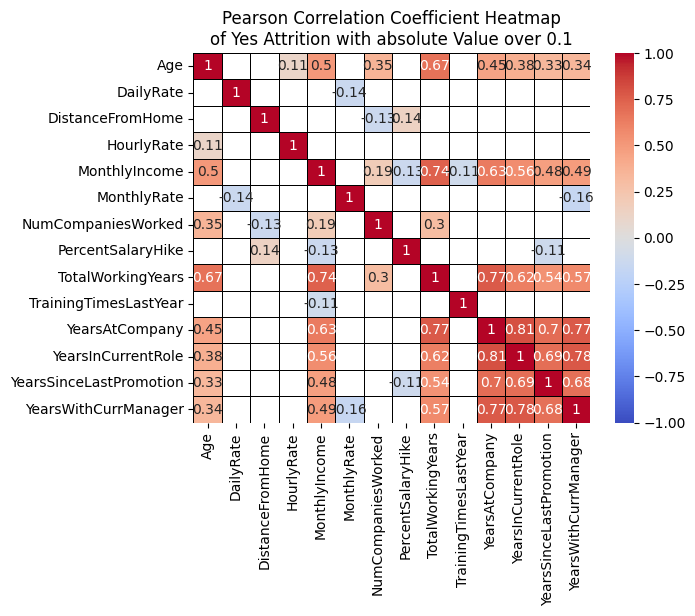

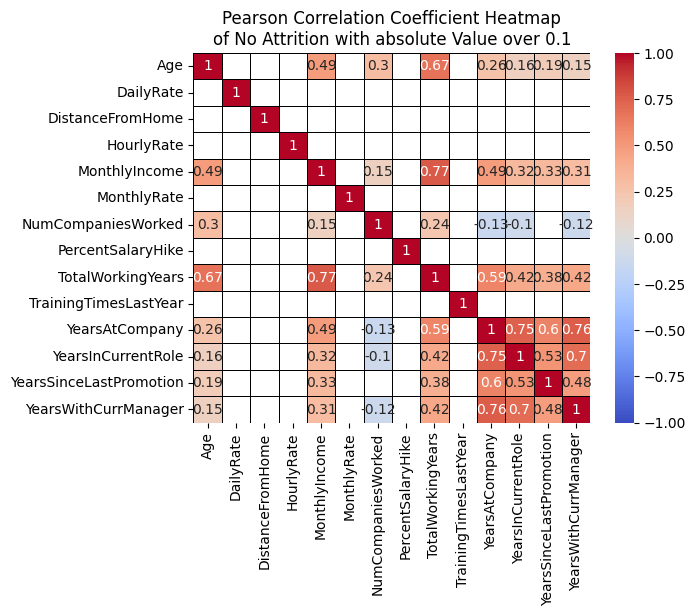

In [22]:
df_Yes_pearson = df_Yes[continuous_column].corr("pearson")
sns.heatmap(df_Yes_pearson[np.abs(df_Yes_pearson) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Pearson Correlation Coefficient Heatmap\nof Yes Attrition with absolute Value over 0.1")
plt.show()

df_No_pearson = df_No[continuous_column].corr("pearson")
sns.heatmap(df_No_pearson[np.abs(df_No_pearson) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5,linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Pearson Correlation Coefficient Heatmap\nof No Attrition with absolute Value over 0.1")
plt.show()


### Kendall's τ Correlation Coefficient
-   켄달-타우 상관계수는 순위형 변수 쌍의 비교에 사용하는 비모수적 검정기법이다.
    -   비모수적 검정기법은 모수적 검정기법의 반의어로 데이터가 특정 확률모델을 따르거나 그것으로 추정된다는 가정을 하지 않는 검정이다.
-   확률변수 X, Y에 대해 모든 쌍 $(x_1,y_1),...,(x_n,y_n)$에 대해 아래와 같이 계산한다.
    -   $$ τ = 1-{2(n(Discordant Pairs)) \over \begin{pmatrix} n\\2 \end{pmatrix}}  $$
    -   Discordant Pairs는 두 확률변수 쌍 $(x_1, y_1), (x_2, y_2)$에 대하여 $x_2 - x_1$과 $y_2 - y_1$의 부호가 서로 다른 변수 쌍을 원소로 가지는 집합이다.
-   -1에서 1 값을 가지며 두 변수의 순위가 서로 같은 방향성을 가지면 1이고 서로 반대의 방향성을 가지면 -1이다.

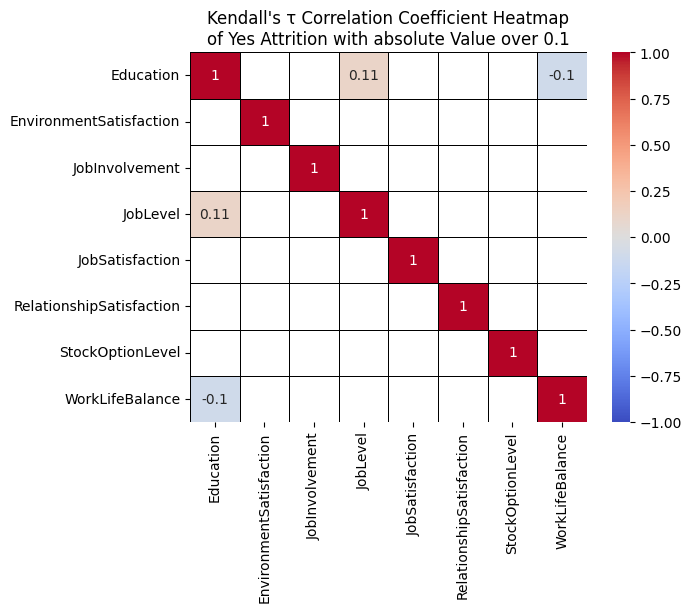

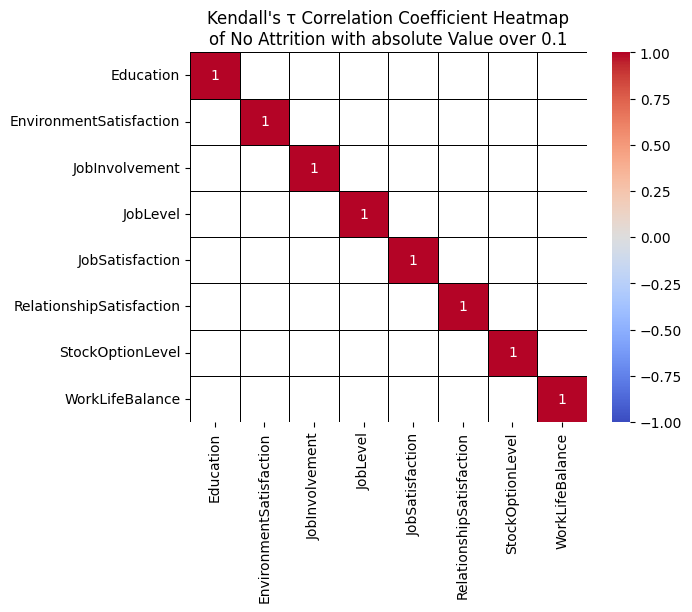

In [23]:
df_Yes_kendall = df_Yes[ordinary_column].corr("kendall")
sns.heatmap(data=df_Yes_kendall[np.abs(df_Yes_kendall) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Kendall's τ Correlation Coefficient Heatmap\nof Yes Attrition with absolute Value over 0.1")
plt.show()

df_No_kendall = df_No[ordinary_column].corr("kendall")
sns.heatmap(df_No_kendall[np.abs(df_No_kendall) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5,linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Kendall's τ Correlation Coefficient Heatmap\nof No Attrition with absolute Value over 0.1")
plt.show()

### Spearman's Rank Correlation Coefficient
-   스피어만 상관계수는 순위형 변수 쌍의 비교에 사용하는 비모수적 검정기법으로 단조함수를 이용해 두 변수 간의 관계를 표현한다.
-   피어슨 상관계수와 마찬가지로 선형관계를 파악하기 때문에 연속형-순위형 변수 쌍에 대해서도 적용할 수 있다.
-   원래 데이터 집합 X, Y와 순위로 변환한 $R(X_i), R(Y_i)$에 대하여 아래와 같이 계산한다.
    -   $$ r_s = {cov(R(X),R(Y)) \over σ_R(X)σ_R(Y)} $$
    -   만약 n개의 순위가 모두 겹치지 않고 고유의 순위라면 $ r_s = 1 - {6Σd^2_i \over n(n^2-1))} $로 계산할 수 있다. 이때 $ d_i $는 두 변수 $ X_i, Y_i $의 순위 값의 차이이다.
-   피어슨 상관계수와 마찬가지로 증가하는 경향성을 보이면 양수로, 감소하는 경향성을 보이면 음수로 나타나며 절대값이 커질수록 단조성을 강하게 띈다.
-   비모수적 방법이기 때문에 피어슨 상관계수가 선형함수로만 설명되는 것과 달리 스피어만 상관계수는 단조함수라면 종류에 무관하게 설명될 수 있다.

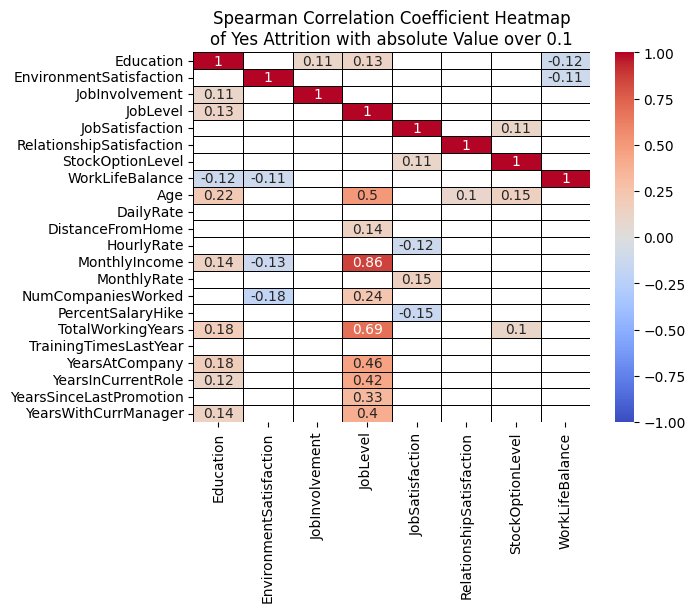

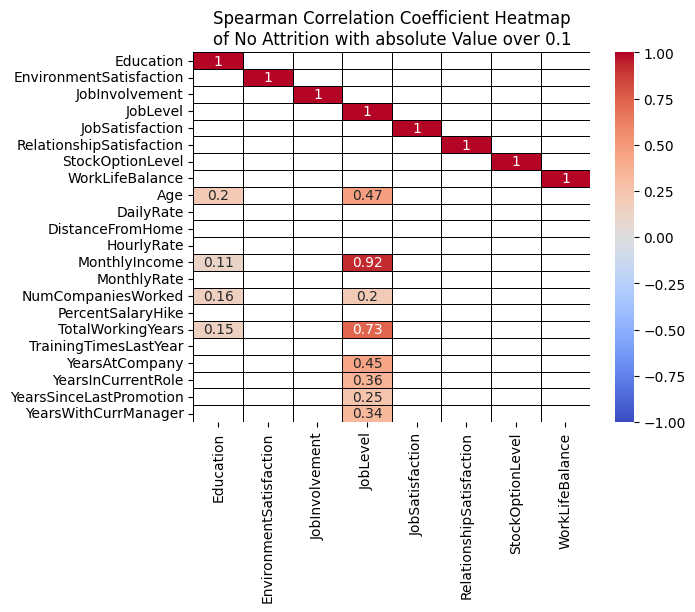

In [24]:
df_Yes_spearman = df_Yes[ordinary_column+continuous_column].corr("spearman")[ordinary_column]
sns.heatmap(df_Yes_spearman[np.abs(df_Yes_spearman) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Spearman Correlation Coefficient Heatmap\nof Yes Attrition with absolute Value over 0.1")
plt.show()

df_No_spearman = df_No[ordinary_column+continuous_column].corr("spearman")[ordinary_column]
sns.heatmap(df_No_spearman[np.abs(df_No_spearman) >= 0.1],
            annot=True, cmap="coolwarm", 
            linewidths=0.5,linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.title("Spearman Correlation Coefficient Heatmap\nof No Attrition with absolute Value over 0.1")
plt.show()

### Point-biserial Correlation Coefficient
-   점이연 상관계수는 이산형-연속형 변수 쌍에 대해 수학적으로 피어슨 상관계수와 같은 방식을 취하는 상관계수이다.
-   연속형 확률변수 X와 이산형 확률변수 Y에 대하여 Y=0인 X의 집합을 $X_0$, Y=1인 X의 집합을 $X_1$이라고 할 때 아래와 같이 계산한다.
    -   $$ r_{pb} = {{E(X_1) - E(X_0) \over s_n}{\sqrt{ n(X_1)n(X_0) \over n(U)^2 }}}, s_n = \sqrt{{V(X) \over n}} $$
-   한편 $n(X_1) + n(X_0) - 2$를 자유도로 하는 t분포인 $ r_{pb}{\sqrt{ n(X_1) + n(X_0) - 2 \over 1 - r^2_{pb} }} $로 변환하여 p값을 구할 수 있다.

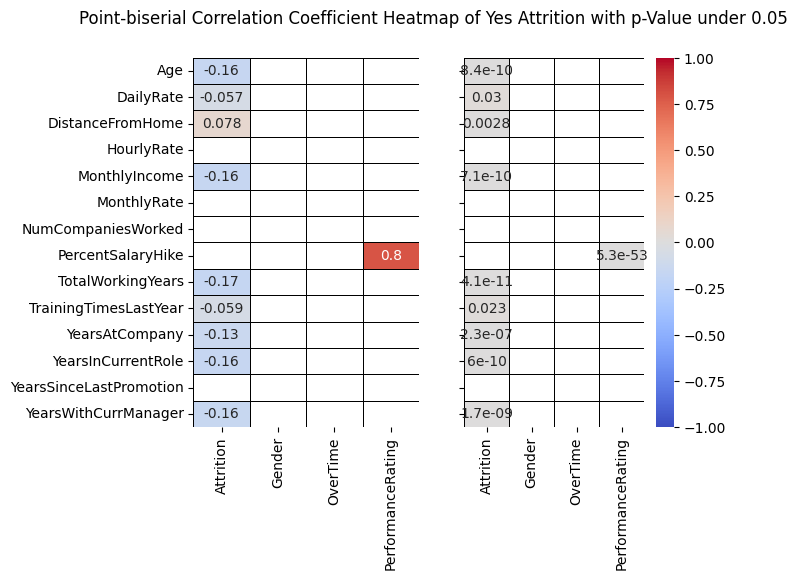

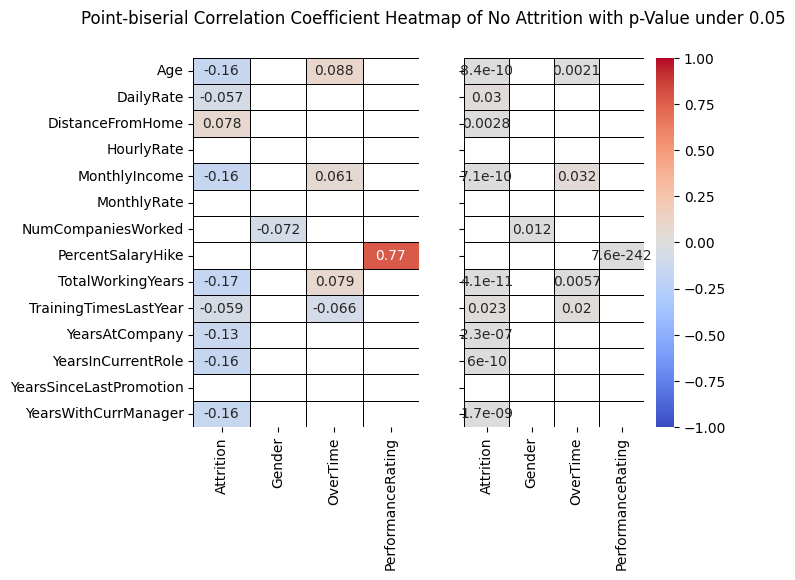

In [25]:
#함수의 반환값이 각각 상관계수 값과 p값이기 때문에 둘 다 출력
df_r_pbr, df_p_pbr = (pd.DataFrame(index=continuous_column, columns=binary_column).astype(float),
                      pd.DataFrame(index=continuous_column, columns=binary_column).astype(float))

for i in continuous_column:
    for j in binary_column:
        #Attrition을 기준으로 나누었기 때문에 PBr이 계산되지 않음
        #때문에 Attrition 부분만 Yes와 No로 나누지 않음
        if j == "Attrition": df_r_pbr.loc[i][j], df_p_pbr.loc[i][j] = stats.pointbiserialr(df[i], df[j])
        else: df_r_pbr.loc[i][j], df_p_pbr.loc[i][j] = stats.pointbiserialr(df_Yes[i], df_Yes[j])

fig = plt.figure(122)
fig.suptitle("Point-biserial Correlation Coefficient Heatmap of Yes Attrition with p-Value under 0.05")
ax1 = fig.add_subplot(121)
sns.heatmap(df_r_pbr[df_p_pbr<=0.05],
            annot=True, cmap="coolwarm",
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0, cbar=False)
plt.yticks(ticks=np.array(range(len(df_r_pbr)))+0.5,labels=df_r_pbr.index)
plt.subplot(122)
sns.heatmap(df_p_pbr[df_p_pbr<=0.05],
            annot=True, cmap="coolwarm",
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.yticks(ticks=np.array(range(len(df_p_pbr)))+0.5,labels=[])
plt.show()

for i in continuous_column:
    for j in binary_column:
        if j == "Attrition": df_r_pbr.loc[i][j], df_p_pbr.loc[i][j] = stats.pointbiserialr(df[i], df[j])
        else: df_r_pbr.loc[i][j], df_p_pbr.loc[i][j] = stats.pointbiserialr(df_No[i], df_No[j])

fig = plt.figure(122)
fig.suptitle("Point-biserial Correlation Coefficient Heatmap of No Attrition with p-Value under 0.05")
plt.subplot(121)
sns.heatmap(df_r_pbr[df_p_pbr<=0.05],
            annot=True, cmap="coolwarm",
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0, cbar=False)
plt.yticks(ticks=np.array(range(len(df_r_pbr)))+0.5,labels=df_r_pbr.index)
plt.subplot(122)
sns.heatmap(df_p_pbr[df_p_pbr<=0.05],
            annot=True, cmap="coolwarm",
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.yticks(ticks=np.array(range(len(df_p_pbr)))+0.5,labels=[])
plt.show()

### Phi Coefficient
-   파이계수는 이산형 변수쌍에 대한 연관성을 측정하며 이산형 변수쌍에 대한 피어슨 상관계수를 계산한 것과 같은 결과가 도출된다.
-   이산확률변수 X, Y에 대하여 $ n_{xy} $는 $ X=x $  $and$  $Y=y$를 만족하는 변수의 수를 나타낼 때 아래와 같이 계산한다.
-   $$ φ = {{n_{11}n_{00} - n_{10}n_{01}} \over {\sqrt{n_{0y}n_{1y}n_{x0}n_{x1}}}} $$
-   -1에서 1의 값을 가지며 -1에 가까울수록 완벽한 불일치를, 1에 가까울수록 완벽한 일치를, 0은 무관함을 의미한다.

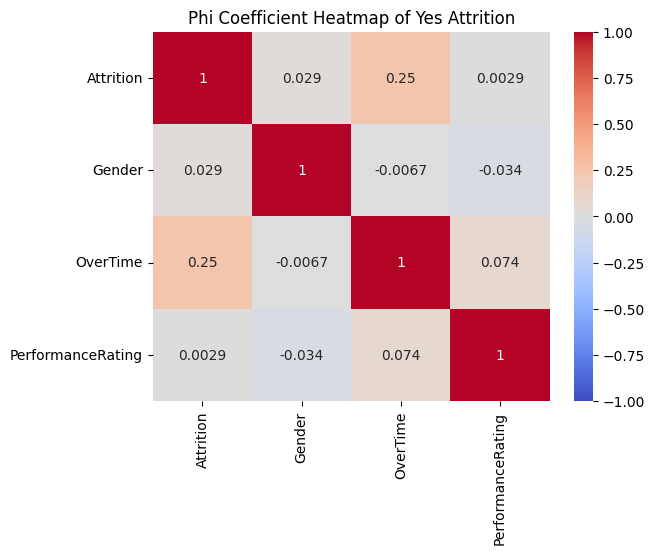

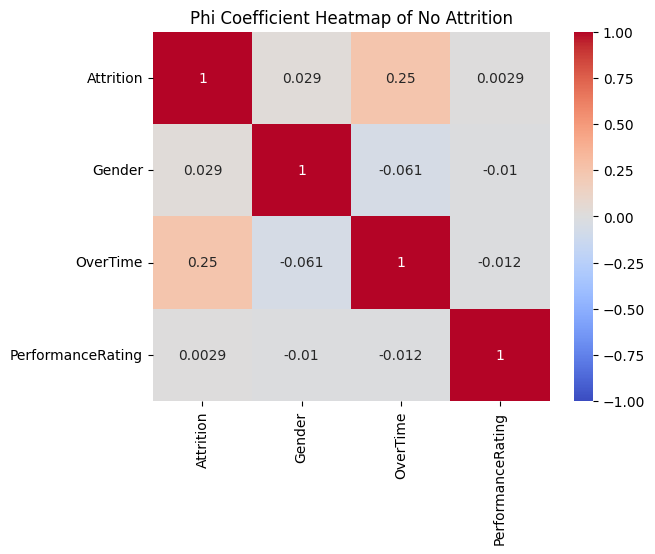

In [26]:
df_Yes_confusion = pd.DataFrame(columns=binary_column, index=binary_column).astype(float)
for i in binary_column:
    for j in binary_column:
        #Attrition을 기준으로 나누었기 때문에 PBr이 계산되지 않음
        #때문에 Attrition 부분만 Yes와 No로 나누지 않음
        if i == "Attrition" or j == "Attrition": df_Yes_confusion.loc[i][j] = matthews_corrcoef(df[i], df[j])
        else: df_Yes_confusion.loc[i][j] = matthews_corrcoef(df_Yes[i], df_Yes[j])
sns.heatmap(df_Yes_confusion, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.title("Phi Coefficient Heatmap of Yes Attrition")
plt.show()

df_No_confusion = pd.DataFrame(columns=binary_column, index=binary_column).astype(float)
for i in binary_column:
    for j in binary_column:
        if i == "Attrition" or j == "Attrition": df_No_confusion.loc[i][j] = matthews_corrcoef(df[i], df[j])
        else: df_No_confusion.loc[i][j] = matthews_corrcoef(df_No[i], df_No[j])
sns.heatmap(df_No_confusion, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.title("Phi Coefficient Heatmap of No Attrition")
plt.show()

Cramer's V
-   Cramer's V는 카이 제곱 검정을 배경으로 하여 명목형 변수 쌍에 대한 연관성을 측정한다.
-   Phi Coefficient φ, 카이 제곱 검정 χ^2, 전체 데이터의 수 n, 열의 수 k, 행의 수 r에 대하여 아래와 같이 계산한다.
-   $$ V = {\sqrt{{φ^2} \over {min(k-1,r-1)}}} = {\sqrt{{χ^2/n} \over {min(k-1,r-1)}}} $$
-   0에서 1의 값을 가지며 값이 클수록 연관성이 큼을 의미한다.

In [27]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

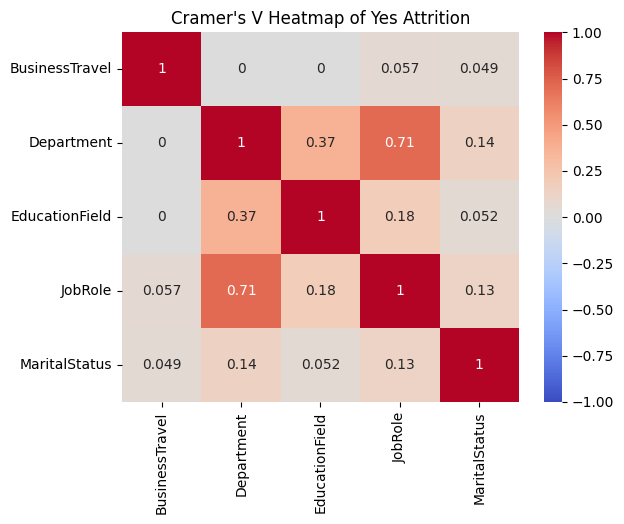

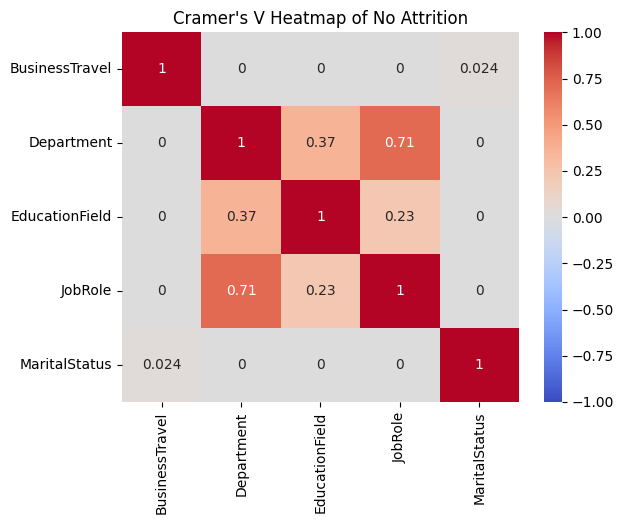

In [28]:
df_Yes_CV = pd.DataFrame(index=category_column, columns=category_column).astype(float)
for i in category_column:
    for j in category_column:
        df_Yes_CV.loc[i][j] = cramers_corrected_stat(pd.crosstab(df_Yes[i], df_Yes[j]).to_numpy())
sns.heatmap(df_Yes_CV, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.title("Cramer's V Heatmap of Yes Attrition")
plt.show()

df_No_CV = pd.DataFrame(index=category_column, columns=category_column).astype(float)
for i in category_column:
    for j in category_column:
        df_No_CV.loc[i][j] = cramers_corrected_stat(pd.crosstab(df_No[i], df_No[j]).to_numpy())
sns.heatmap(df_No_CV, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.title("Cramer's V Heatmap of No Attrition")
plt.show()